In [4]:
import torch
import torch.nn as nn

linear_model = nn.Linear(1, 1)
t = torch.tensor([[1.2999999], [3.9]])
linear_model(t)

tensor([[1.2326],
        [3.7667]], grad_fn=<AddmmBackward0>)

In [5]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.9747]], requires_grad=True),
 Parameter containing:
 tensor([-0.0345], requires_grad=True))

In [6]:
x = torch.ones(2, 1)
linear_model(x)
x.unsqueeze_(0).unsqueeze_(0)
x
linear_model.parameters(), list(linear_model.parameters())

(<generator object Module.parameters at 0x7fa60c35aac0>,
 [Parameter containing:
  tensor([[0.9747]], requires_grad=True),
  Parameter containing:
  tensor([-0.0345], requires_grad=True)])

In [7]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u.shape
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
shuffled_indices

train_indices = shuffled_indices[:-n_val]
validation_indices = shuffled_indices[-n_val:]

train_indices, validation_indices

train_t_u = t_u[train_indices].unsqueeze_(1)
train_t_c = t_c[train_indices].unsqueeze_(1)

val_t_u = t_u[validation_indices].unsqueeze_(1)
val_t_c = t_c[validation_indices].unsqueeze_(1)

def loss_fn(t_u, t_c):
    loss = ((t_u - t_c)**2).sum()
    return loss

loss_fn(torch.tensor([1,2,3]), torch.tensor([0.9, 0.9, 3.5]))

tensor(1.4700)

In [8]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, 
                  t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        # print(model.hidden_linear.weight.grad)
        
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f}')
            print(f'    Validation loss {loss_val.item():.4f}')


In [9]:
import torch.optim as optim

linear_model = nn.Linear(1, 1)
optimizer = optim.Adam(linear_model.parameters(), lr=0.1)

params = training_loop(
    n_epochs=10000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=train_t_u,
    t_c_train=train_t_c,
    t_c_val=val_t_c,
    t_u_val=val_t_u
)

Epoch 500, Training loss 5.6785
    Validation loss 21.9305
Epoch 1000, Training loss 3.0104
    Validation loss 6.4761
Epoch 1500, Training loss 2.9726
    Validation loss 5.1805
Epoch 2000, Training loss 2.9725
    Validation loss 5.1325
Epoch 2500, Training loss 2.9725
    Validation loss 5.1322
Epoch 3000, Training loss 2.9725
    Validation loss 5.1321
Epoch 3500, Training loss 2.9725
    Validation loss 5.1321
Epoch 4000, Training loss 2.9725
    Validation loss 5.1321
Epoch 4500, Training loss 2.9725
    Validation loss 5.1321
Epoch 5000, Training loss 2.9725
    Validation loss 5.1320
Epoch 5500, Training loss 2.9727
    Validation loss 5.2194
Epoch 6000, Training loss 2.9725
    Validation loss 5.1320
Epoch 6500, Training loss 2.9725
    Validation loss 5.1321
Epoch 7000, Training loss 2.9725
    Validation loss 5.1320
Epoch 7500, Training loss 2.9729
    Validation loss 5.0044
Epoch 8000, Training loss 2.9725
    Validation loss 5.1368
Epoch 8500, Training loss 2.9725
    Val

In [10]:
linear_model.bias, linear_model.weight

(Parameter containing:
 tensor([-16.0064], requires_grad=True),
 Parameter containing:
 tensor([[0.5040]], requires_grad=True))

In [11]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model, list(seq_model.parameters()), [p.shape for p in seq_model.parameters()]

(Sequential(
   (0): Linear(in_features=1, out_features=13, bias=True)
   (1): Tanh()
   (2): Linear(in_features=13, out_features=1, bias=True)
 ),
 [Parameter containing:
  tensor([[ 0.3807],
          [ 0.0495],
          [-0.7050],
          [ 0.5971],
          [-0.4850],
          [ 0.6231],
          [-0.8809],
          [-0.9657],
          [-0.3604],
          [ 0.6533],
          [ 0.2142],
          [ 0.7012],
          [ 0.8259]], requires_grad=True),
  Parameter containing:
  tensor([ 0.3919,  0.9131,  0.5843,  0.2170,  0.0036,  0.5820, -0.1230, -0.0416,
          -0.6134,  0.8160,  0.7807,  0.1644,  0.0200], requires_grad=True),
  Parameter containing:
  tensor([[-0.0394, -0.0236, -0.1129,  0.0835, -0.1775, -0.0183, -0.1539, -0.1141,
            0.0556, -0.1768, -0.1651,  0.1102,  0.0501]], requires_grad=True),
  Parameter containing:
  tensor([-0.0973], requires_grad=True)],
 [torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])])

In [12]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 50)),
    ('hidden _activation', nn.Tanh()),
    ('output_linear', nn.Linear(50, 1))
]))

In [13]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)
    
seq_model.output_linear.bias

hidden_linear.weight torch.Size([50, 1])
hidden_linear.bias torch.Size([50])
output_linear.weight torch.Size([1, 50])
output_linear.bias torch.Size([1])


Parameter containing:
tensor([-0.0579], requires_grad=True)

In [14]:
seq_optim = optim.Adam(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs=10000,
    optimizer=seq_optim,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=train_t_u,
    t_c_train=train_t_c,
    t_u_val=val_t_u,
    t_c_val=val_t_c
)

linear_model

Epoch 500, Training loss 88.9327
    Validation loss 424.3661
Epoch 1000, Training loss 66.5249
    Validation loss 349.2887
Epoch 1500, Training loss 52.2778
    Validation loss 292.0929
Epoch 2000, Training loss 43.1479
    Validation loss 248.8533
Epoch 2500, Training loss 36.8437
    Validation loss 215.5152
Epoch 3000, Training loss 32.2718
    Validation loss 189.7220
Epoch 3500, Training loss 28.4578
    Validation loss 169.1539
Epoch 4000, Training loss 25.0955
    Validation loss 152.1056
Epoch 4500, Training loss 21.9436
    Validation loss 137.5216
Epoch 5000, Training loss 18.9406
    Validation loss 124.5877
Epoch 5500, Training loss 16.1086
    Validation loss 112.7553
Epoch 6000, Training loss 13.5067
    Validation loss 101.6619
Epoch 6500, Training loss 11.1974
    Validation loss 91.0817
Epoch 7000, Training loss 9.2247
    Validation loss 80.8968
Epoch 7500, Training loss 7.6036
    Validation loss 71.0697
Epoch 8000, Training loss 6.3186
    Validation loss 61.6349


Linear(in_features=1, out_features=1, bias=True)

In [15]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.5040]], requires_grad=True),
 Parameter containing:
 tensor([-16.0064], requires_grad=True))

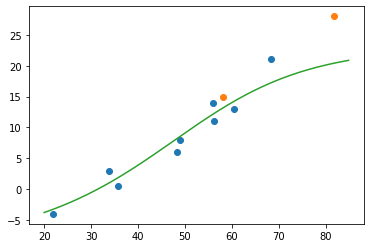

In [16]:
from matplotlib import pyplot as plt
import numpy as np

plt.plot(train_t_u, train_t_c, 'o')
plt.plot(val_t_u, val_t_c, 'o')
input_t = torch.tensor(np.arange(20, 85, 0.1)).unsqueeze_(1).to(torch.float32)
plt.plot(np.arange(20,85,0.1), [seq_model(a).item() for a in input_t])

In [17]:
wine_path = '../dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv'
wine_data = np.loadtxt(wine_path, skiprows=1, delimiter=';', dtype='float32')
wine_t = torch.from_numpy(wine_data)
wine_t.shape

torch.Size([4898, 12])

In [53]:
wine_model = nn.Sequential(
    nn.Linear(10, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.Softmax()
)

val_prop = 0.2

n_row, n_col = wine_t.shape

n_val = int(n_row * val_prop)
val_indices = torch.randperm(n_row)

print(val_indices[:10])
wine_train_i = wine_t[val_indices[:-n_val], :n_col - 2]
wine_train_s = wine_t[val_indices[:-n_val], n_col - 1].to(torch.int64).unsqueeze_(1)
wine_train_o = torch.zeros([wine_train_s.shape[0], 10])
wine_train_o = wine_train_o.scatter_(1, wine_train_s, 1.0)

wine_val_i = wine_t[val_indices[-n_val:], :n_col - 2]
wine_val_s = wine_t[val_indices[-n_val:], n_col - 1].to(torch.int64).unsqueeze_(1)
wine_val_o = torch.zeros([wine_val_s.shape[0], 10])
wine_val_o = wine_val_o.scatter_(1, wine_val_s, 1.0)

wine_train_i.shape, wine_train_o.shape, wine_val_i.shape, wine_val_o.shape

tensor([2398, 3155, 3635, 1385, 1594,   44, 2532,  800,  820, 3771])


(torch.Size([3919, 10]),
 torch.Size([3919, 10]),
 torch.Size([979, 10]),
 torch.Size([979, 10]))

In [58]:
import torch.optim as optim

wine_optim = optim.Adam(wine_model.parameters(), lr=1e-1)

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, 
                  t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        
        loss_train.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f}')
            print(f'    Validation loss {loss_val.item():.4f}')


In [59]:
training_loop(
    n_epochs=5000,
    optimizer=wine_optim,
    model=wine_model,
    loss_fn=nn.CrossEntropyLoss(),
    t_u_train=wine_train_i,
    t_c_train=wine_train_o,
    t_u_val=wine_val_i,
    t_c_val=wine_val_o
)

/home/hoagy/AIS/muz/venv/lib/python3.8/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 500, Training loss 2.0115
    Validation loss 2.0158
Epoch 1000, Training loss 2.0115
    Validation loss 2.0158
Epoch 1500, Training loss 2.0115
    Validation loss 2.0158
Epoch 2000, Training loss 2.0115
    Validation loss 2.0158
Epoch 2500, Training loss 2.0115
    Validation loss 2.0158
Epoch 3000, Training loss 2.0115
    Validation loss 2.0158
Epoch 3500, Training loss 2.0115
    Validation loss 2.0158
Epoch 4000, Training loss 2.0115
    Validation loss 2.0158
Epoch 4500, Training loss 2.0115
    Validation loss 2.0158
Epoch 5000, Training loss 2.0115
    Validation loss 2.0158
